In [47]:
import pandas as pd

import os

import numpy as np

import networkx as nx

import matplotlib.pyplot as plt

from statsmodels.distributions.empirical_distribution import ECDF

from IPython.display import clear_output

import community
from community import community_louvain
from collections import Counter
from networkx.algorithms.community import k_clique_communities

import math



In [48]:
def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig('analysis/positive/{}.png'.format(fig_id), format='png', dpi=300)

In [49]:
df_metrics_values_rows=[]

In [50]:
df_giant_metrics_values_rows=[]

In [51]:
#importo il grafo completo
first_graph = nx.read_gpickle('data/graphs/positive/positive_graph.gpickle')

# Prime misure generali
## Numero di nodi e link

In [52]:
n_nodes = first_graph.number_of_nodes()
n_links = first_graph.number_of_edges()
print("Number of nodes:\t{}".format(n_nodes))
print("Number of links:\t{}".format(n_links))
df_metrics_values_rows.append(('Number of nodes',n_nodes))
df_metrics_values_rows.append(('Number of links',n_links))

Number of nodes:	10577
Number of links:	154621


## Grado medio e densità

In [53]:
degrees_dict = dict(first_graph.degree()).values()
degrees_list = list(degrees_dict)
avg_degree = np.mean(degrees_list)
density = nx.density(first_graph)
print('Average degree:\t{}'.format(avg_degree))
print('Density:\t{}'.format(density))
df_metrics_values_rows.append(('Average degree',avg_degree))
df_metrics_values_rows.append(('Density',density))

Average degree:	29.237212820270397
Density:	0.002764486840040696


# Analisi della distribuzione del grado

In [54]:
std_dev =np.std(degrees_list)
median = np.median(degrees_list)
minimum=np.min(degrees_list)
maximum=np.max(degrees_list)
print("Average degree:\t\t{}".format(avg_degree))
print('Standard deviation:\t{}'.format(std_dev))
print('Median:\t\t\t{}'.format(median))
print('Minimum:\t\t{}'.format(minimum))
print('Maximum:\t\t{}'.format(maximum))
df_metrics_values_rows.append(('Degree standard deviation',std_dev))
df_metrics_values_rows.append(('Median degree',median))
df_metrics_values_rows.append(('Minimum degree',minimum))
df_metrics_values_rows.append(('Maximum degree',maximum))

Average degree:		29.237212820270397
Standard deviation:	36.50942940626366
Median:			10.0
Minimum:		0
Maximum:		250


## ECDF - loglog scale

Saving figure ecdf
Saving figure eccdf


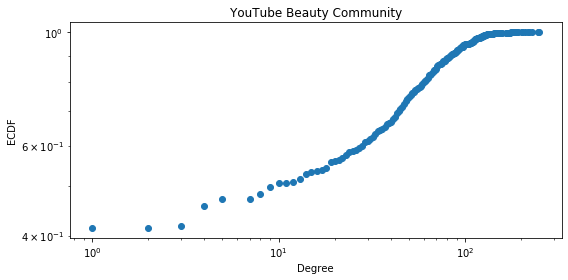

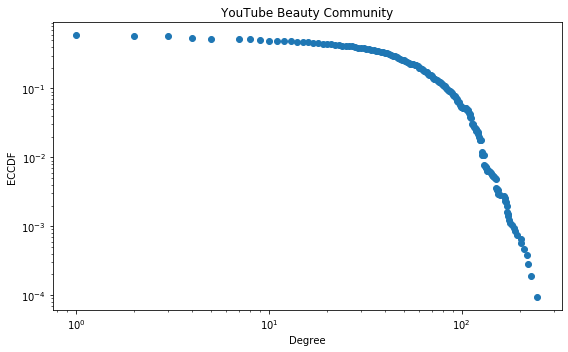

In [55]:
ecdf = ECDF(degrees_list)
x = np.unique(degrees_list)

y = ecdf(x)
fig_ecdf = plt.figure(figsize=(8,4))
axes = fig_ecdf.gca()
axes.loglog(x,y,marker = 'o', ms = 6, linestyle='None')
axes.set_ylabel('ECDF')
axes.set_xlabel('Degree')
plt.title('YouTube Beauty Community')

save_fig('ecdf')

y = 1-ecdf(x)
fig_ccdf_function = plt.figure(figsize=(8,5))
axes = fig_ccdf_function.gca()
axes.loglog(x,y,marker = 'o', ms = 6, linestyle='None')
axes.set_xlabel('Degree')
axes.set_ylabel('ECCDF')
plt.title('YouTube Beauty Community')

save_fig('eccdf')

## Confronto con rete equivalente E-R

In [56]:
p = density

### Faccio la media di più reti random

In [57]:
er_avgs = []
er_stds = []
er_medians = []
er_mins = []
er_maxs = []

In [58]:
for i in range(10):
    print('{}/10'.format(i))
    clear_output(wait=True)
    random_graph = nx.fast_gnp_random_graph(n_nodes,p)
    er_degrees_dict = dict(random_graph.degree()).values()
    er_degrees_list = list(er_degrees_dict)
    er_avgs.append(np.mean(er_degrees_list))
    er_stds.append(np.std(er_degrees_list))
    er_medians.append(np.median(er_degrees_list))
    er_mins.append(np.min(er_degrees_list))
    er_maxs.append(np.max(er_degrees_list))

9/10


In [59]:
er_n_nodes = random_graph.number_of_nodes()
er_n_links = random_graph.number_of_edges()

pd_rows=[]

er_avg_degree = np.mean(er_avgs)
er_density = nx.density(random_graph)
er_std_dev = np.mean(er_stds)
er_median = np.mean(er_medians)
er_minimum = np.mean(er_mins)
er_maximum = np.mean(er_maxs)
pd_rows.append(('Number of nodes',n_nodes,er_n_nodes))
pd_rows.append(('Number of links',n_links,er_n_links))
pd_rows.append(('Density',density,er_density))
pd_rows.append(('Average degree',avg_degree,er_avg_degree))
pd_rows.append(('Degree standard deviation',std_dev,er_std_dev))
pd_rows.append(('Median degree',median,er_median))
pd_rows.append(('Minimum degree',minimum,er_minimum))
pd_rows.append(('Maximum degree',maximum,er_maximum))

df_real_er_comparison = pd.DataFrame(pd_rows, columns=['Metric name','Real network','Random network'])
df_real_er_comparison.to_csv('analysis/positive/df_real_er_comparison.csv')
print('NETWORKS COMPARISON')
print(df_real_er_comparison)

NETWORKS COMPARISON
                 Metric name   Real network  Random network
0            Number of nodes   10577.000000    10577.000000
1            Number of links  154621.000000   154597.000000
2                    Density       0.002764        0.002764
3             Average degree      29.237213       29.208301
4  Degree standard deviation      36.509429        5.414334
5              Median degree      10.000000       29.000000
6             Minimum degree       0.000000       10.400000
7             Maximum degree     250.000000       52.100000


                 Metric name   Real network  Random network
0            Number of nodes   10577.000000    10577.000000
1            Number of links  154621.000000   155024.000000
2                    Density       0.002764        0.002772
3             Average degree      29.237213       29.313416
4  Degree standard deviation      36.509429        5.430698
5              Median degree      10.000000       29.000000
6             Minimum degree       0.000000       11.000000
7             Maximum degree     250.000000       52.000000
Saving figure YouTube Beauty Community vs Erdos-Renyi


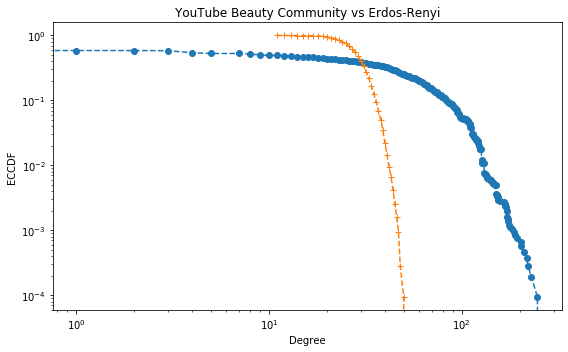

In [60]:
pd_rows=[]

random_graph = nx.fast_gnp_random_graph(n_nodes,p)
er_n_nodes = random_graph.number_of_nodes()
er_n_links = random_graph.number_of_edges()
er_degrees_dict = dict(random_graph.degree()).values()
er_degrees_list = list(er_degrees_dict)
er_avg_degree = np.mean(er_degrees_list)
er_density = nx.density(random_graph)
er_std_dev = np.std(er_degrees_list)
er_median = np.median(er_degrees_list)
er_minimum = np.min(er_degrees_list)
er_maximum = np.max(er_degrees_list)
pd_rows.append(('Number of nodes',n_nodes,er_n_nodes))
pd_rows.append(('Number of links',n_links,er_n_links))
pd_rows.append(('Density',density,er_density))
pd_rows.append(('Average degree',avg_degree,er_avg_degree))
pd_rows.append(('Degree standard deviation',std_dev,er_std_dev))
pd_rows.append(('Median degree',median,er_median))
pd_rows.append(('Minimum degree',minimum,er_minimum))
pd_rows.append(('Maximum degree',maximum,er_maximum))

df = pd.DataFrame(pd_rows, columns=['Metric name','Real network','Random network'])
df.to_csv('analysis/positive/df_real_er_comparison_one.csv')
print(df)

ecdf = ECDF(degrees_list)
x = np.unique(degrees_list)
y = 1-ecdf(x)
er_ecdf = ECDF(er_degrees_list)
er_x = np.unique(er_degrees_list)
er_y = 1-er_ecdf(er_x)

fig_ecdf_youtube = plt.figure(figsize=(8,5))
axes = fig_ecdf_youtube.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(x,y,marker = 'o', ms = 6, linestyle='--')
axes.loglog(er_x,er_y,marker = '+', ms = 6, linestyle='--')
axes.set_xlabel('Degree')
axes.set_ylabel('ECCDF')
plt.title('YouTube Beauty Community vs Erdos-Renyi')

save_fig('YouTube Beauty Community vs Erdos-Renyi')

# Hubs

In [61]:
percentile_99 = np.percentile(degrees_list,99)
percentile_95 = np.percentile(degrees_list,95)
print("Percentile 99:{}".format(percentile_99))
print("Percentile 95:{}".format(percentile_95))
df_metrics_values_rows.append(('Percentile 99',percentile_99))

Percentile 99:131.0
Percentile 95:106.0


In [62]:
hub_nodi = [k for k,v in dict(first_graph.degree()).items() if v>= percentile_99]
print(hub_nodi)
df_metrics_values_rows.append(('Number of hubs',len(hub_nodi)))

['Teaira Walker', 'Michelle', 'Marisa Singh', 'Haleigh Yates', 'Natalia', 'Amanda Ensing', 'Jawaid Anwer', 'Rosie Veronica', 'Christine Marie', 'amygirls world', 'Lavender Fields', 'Girl Trucker', 'Erica', 'Christen Dominique', 'Jordan Fields', 'Amanda Clark', 'MoiMoi Khan', 'Latavia Williams', 'Fly with Fizzle', 'c jay', 'Keri Rhinehart', 'EMAN', 'kasarasak k', 'Jaana Olnev', 'Lauren Tokunaga', 'Ilce Geovanna Salinas Morales', 'Trishanaclo', 'Nikita Calimbayan', 'V M', 'Mimi Meyers', 'Kittenx kore', 'Dinar Singer', 'Sherri Hoffman', 'Ash', 'Judy Howell', 'Olivia Miranda', 'Murphy Star', 'Stacey Griego', 'Staci White', 'Annette Espinoza', 'vicwilson87', 'Jackie Aina', 'Graceful Knots', 'K M', 'Amy Meherg', 'lilita p', 'Ishie Boom boom', 'Grace', 'karidish', 'Zainab Noor', 'Sarah', 'kardonay', 'Angie', 'Dee Luther', 'Jessa Marie Pole', 'Ashley Smith', 'Spirit Within Apothecary', 'Camille Anderson', 'Gemma Diaz', 'Cynthia Saikaly', 'Violet Maggs', 'Kay The MilkShake', 'Erika Yuen', 'Jami

In [63]:
np.save('analysis/positive/hubs.npy',hub_nodi)

# Isolates

In [64]:
isolates = list(nx.isolates(first_graph))
print(isolates)
np.save('analysis/positive/isolates.npy',isolates)
df_metrics_values_rows.append(('Number of isolates',len(isolates)))

['Narelys Negron', '도연Doyeon', 'Alexa Levidi', 'Anni Duky', 'l e x i m o n t y', 'Nancy Rodriguez', 'Jenny Jen1010', "DIzzyY's MSD", 'Stephanie Shaffer', 'SamGal1624', 'Arielle Brittany', 'Kobe Pina', 'Kitty Keylee', 'Cathy Bynum', 'Her Majesty THE Queen', 'Katie Moore', 'Chasadie Pinnock', 'Katie Dahl', 'Mai Vang', 'Wawters', 'Olivia P', 'Audrey Barr', 'Maria Monteverde', 'Courtney Douglass', 'MsZa124', 'Alyssa Poplaski', 'Nina Bina', 'Jess Wd', 'Atari Artistry', 'Inna Morozova', 'Ana R. Alvarez', 'Alma Martinez', 'brittany schooley', 'Jordyn Halee', 'The Fonz', 'Katrina Padron', 'Lupe Martinez', 'F Mochi', 'Samantha Gambill', 'moonwitch', 'Sara H', 'Della', 'Ashley Holenchick', 'Sarah Foshee', 'kazeem786', 'Charmaine Kwin', 'Matilde Raab', 'Siera Wright', 'emma bellgowan', 'Alex Green', 'Christlee Hooks', 'Catqueen 2107', 'Jheramie Mendoza', 'Beauty by Ally Benavidez', 'Julia Caldera', 'Fetiha ፈቲያ', 'Gloria Watson', 'Deanna', 'cassandra weishaar', 'Karina Mendez', 'Jackie Garcia', 'J

# Connettività

In [65]:
print("The network is {}.".format("connected" if nx.is_connected(first_graph) else "not connected"))
n_components = nx.number_connected_components(first_graph)
print("There are {} components.".format(n_components))
df_metrics_values_rows.append(('Number of connected components',n_components))

The network is not connected.
There are 4434 components.


In [66]:
connected_components = []
for component in nx.connected_components(first_graph):
    connected_components.append(component)
np.save('analysis/positive/connected_components.npy',connected_components)

## Studio della giant component

In [67]:
giant_component = max([(first_graph.subgraph(c).copy(),first_graph.subgraph(c).copy().order()) for c in nx.connected_components(first_graph)],key = lambda x:x[1])
giant_component=giant_component[0]

In [68]:
giant_degrees_dict = dict(giant_component.degree()).values()
giant_degrees_list = list(giant_degrees_dict)
giant_density = nx.density(giant_component)
giant_avg_degree = np.mean(giant_degrees_list)
giant_std_dev =np.std(giant_degrees_list)
giant_median = np.median(giant_degrees_list)
giant_minimum=np.min(giant_degrees_list)
giant_maximum=np.max(giant_degrees_list)
df_giant_metrics_values_rows.append(('Average degree',avg_degree))
df_giant_metrics_values_rows.append(('Density',density))
df_giant_metrics_values_rows.append(('Degree standard deviation',std_dev))
df_giant_metrics_values_rows.append(('Median degree',median))
df_giant_metrics_values_rows.append(('Minimum degree',minimum))
df_giant_metrics_values_rows.append(('Maximum degree',maximum))
print("Average degree:\t\t{}".format(giant_avg_degree))
print('Density:\t\t{}'.format(giant_density))
print('Standard deviation:\t{}'.format(giant_std_dev))
print('Median:\t\t\t{}'.format(giant_median))
print('Minimum:\t\t{}'.format(giant_minimum))
print('Maximum:\t\t{}'.format(giant_maximum))

Average degree:		52.628482972136226
Density:		0.0090535838589603
Standard deviation:	34.638492568131035
Median:			48.0
Minimum:		2
Maximum:		250


## Distribuzione della size delle componenti connesse

Saving figure Connected component size distribution


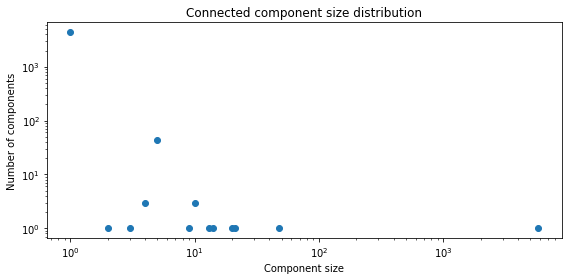

In [69]:
x = np.unique([len(c) for c in connected_components])

y = []
counter=0
for sz in x:
    for c in connected_components:
        if len(c) == sz:
            counter+=1
    y.append(counter)
    counter = 0
fig_ecdf = plt.figure(figsize=(8,4))
axes = fig_ecdf.gca()
axes.loglog(x,y,marker = 'o', ms = 6, linestyle='None')
axes.set_xlabel('Component size')
axes.set_ylabel('Number of components')
plt.title('Connected component size distribution')

save_fig('Connected component size distribution')

# Transitività

In [70]:
avg_clustering_coeff = nx.average_clustering(first_graph)
df_metrics_values_rows.append(('Average local clustering coefficient',avg_clustering_coeff))

In [ ]:
transitivity = nx.transitivity(first_graph)
df_metrics_values_rows.append(("Transitivity (global clustering)",transitivity))

In [ ]:
clustering=nx.clustering(first_graph)
np.save('analysis/positive/clustering.npy',clustering)

In [ ]:
print('Transitivity (global clustering):{}'.format(transitivity))
print('Average local clustering coefficient:{}'.format(avg_clustering_coeff))
print('Local clustering:{}'.format(clustering))

In [ ]:
local_clustering_dev_std = np.std(list(clustering.values()))
local_clustering_min = np.min(list(clustering.values()))
local_clustering_max = np.max(list(clustering.values()))
local_clustering_mean = np.mean(list(clustering.values()))
local_clustering_median = np.median(list(clustering.values()))
df_metrics_values_rows.append(("Average local clustering (mediated)",local_clustering_mean))
df_metrics_values_rows.append(("Local clustering standard deviation (mediated)",local_clustering_dev_std))
df_metrics_values_rows.append(("Median local clustering (mediated)",local_clustering_median))
df_metrics_values_rows.append(("Minimum local clustering (mediated)",local_clustering_min))
df_metrics_values_rows.append(("Maximum local clustering (mediated)",local_clustering_max))
print("Average local clustering (mediated):\t\t{}".format(local_clustering_mean))
print('Local clustering standard deviation (mediated):\t{}'.format(local_clustering_dev_std))
print('Median local clustering (mediated):\t\t{}'.format(local_clustering_median))
print('Minimum local clustering (mediated):\t\t{}'.format(local_clustering_min))
print('Maximum local clustering (mediated):\t\t{}'.format(local_clustering_max))

In [ ]:
x = np.unique([item for item in list(clustering.values())])

y = []
counter=0
for sz in x:
    for item in list(clustering.values()):
        if item == sz:
            counter+=1
    y.append(counter)
    counter = 0
fig_ecdf = plt.figure(figsize=(8,4))
axes = fig_ecdf.gca()
axes.loglog(x,y,marker = 'o', ms = 6, linestyle='None')
axes.set_xlabel('Local clustering coefficient')
axes.set_ylabel('Number of nodes')
plt.title('Local clustering coefficient distribution')

save_fig('Local clustering coefficient distribution')

In [ ]:
ecdf = ECDF(list(clustering.values()))
x = np.unique(list(clustering.values()))
y = ecdf(x)
fig_ecdf = plt.figure(figsize=(8,4))
axes = fig_ecdf.gca()
axes.loglog(x,y,marker = 'o', ms = 6, linestyle='None')
axes.set_xlabel('Local clustering coefficient')
axes.set_ylabel('ECDF')
plt.title('ECDF Local clustering coefficient distribution')

save_fig('ECDF Local clustering coefficient distribution')

# Assortativity

In [ ]:
degree_assortativity = nx.degree_assortativity_coefficient(first_graph)
df_metrics_values_rows.append(("Degree assortativity",degree_assortativity))

In [ ]:
print("Degree assortativity:{}".format(degree_assortativity))

In [ ]:
nodes_attributes = []
for n in first_graph.nodes().values():
    nodes_attributes = list(n.keys())
    break

In [ ]:
assortativity_coefficients = []
for idx, attr in enumerate(nodes_attributes):
    print('{}/{}'.format(idx,len(nodes_attributes)))
    clear_output(wait=True)
    assortativity_coefficients.append((attr,nx.attribute_assortativity_coefficient(first_graph,attr)))
np.save('analysis/positive/assortativity_coefficients.npy',assortativity_coefficients)

In [ ]:
assortativity_coefficients

In [ ]:
assortativity_min = min(assortativity_coefficients, key=lambda x: x[1])
assortativity_max = max(assortativity_coefficients, key=lambda x: x[1])
nan_assortativity_values = [item for item in assortativity_coefficients if math.isnan(item[1])]
np.save('analysis/positive/nan_assortativity_values.npy',nan_assortativity_values)
df_metrics_values_rows.append(("Minimum assortativity cofficient",assortativity_min))
df_metrics_values_rows.append(("Maximum assortativity cofficient",assortativity_max))
df_metrics_values_rows.append(("Number of NaN assortativity values",len(nan_assortativity_values)))
print('Minimum assortativity cofficient:\t\t{}'.format(assortativity_min))
print('Maximum assortativity cofficient:\t\t{}'.format(assortativity_max))
print('NaN assortativity values:\t\t{}\n{}'.format(len(nan_assortativity_values),nan_assortativity_values))

## Assortatività nella giant component

In [ ]:
print("GIANT COMPONENT")
giant_degree_assortativity = nx.degree_assortativity_coefficient(giant_component)
df_giant_metrics_values_rows.append(("Degree assortativity",giant_degree_assortativity))
print("Degree assortativity:{}".format(giant_degree_assortativity))
giant_nodes_attributes = []
for n in giant_component.nodes().values():
    giant_nodes_attributes = list(n.keys())
    break
giant_assortativity_coefficients = []
for idx, attr in enumerate(giant_nodes_attributes):
    print('{}/{}'.format(idx,len(giant_nodes_attributes)))
    clear_output(wait=True)
    giant_assortativity_coefficients.append((attr,nx.attribute_assortativity_coefficient(giant_component,attr)))
np.save('analysis/positive/giant_assortativity_coefficients.npy',giant_assortativity_coefficients)
giant_assortativity_min = min(giant_assortativity_coefficients, key=lambda x: x[1])
giant_assortativity_max = max(giant_assortativity_coefficients, key=lambda x: x[1])
giant_nan_assortativity_values = [item for item in giant_assortativity_coefficients if math.isnan(item[1])]
df_giant_metrics_values_rows.append(("Minimum assortativity cofficient",giant_assortativity_min))
df_giant_metrics_values_rows.append(("Maximum assortativity cofficient",giant_assortativity_max))
df_giant_metrics_values_rows.append(("Number of NaN assortativity values",len(giant_nan_assortativity_values)))
print('Minimum assortativity cofficient:\t\t{}'.format(giant_assortativity_min))
print('Maximum assortativity cofficient:\t\t{}'.format(giant_assortativity_max))
print('NaN assortativity values:\t\t{}\n{}'.format(len(giant_nan_assortativity_values),giant_nan_assortativity_values))

# Community detection

In [ ]:
partition_louvain = community_louvain.best_partition(first_graph)
np.save('analysis/positive/partition_louvain.npy',partition_louvain)
number_of_communities = len(set(partition_louvain.values()))
print('Number of communities: ', number_of_communities)
df_metrics_values_rows.append(("Number of communities",number_of_communities))
print(Counter(partition_louvain.values()))

In [ ]:
modularity = community.modularity(partition_louvain,first_graph)
df_metrics_values_rows.append(("Modularity",modularity))
print('Modularity:', modularity)

## Community detection nella giant component

In [ ]:
giant_partition_louvain = community_louvain.best_partition(giant_component)
np.save('analysis/positive/giant_partition_louvain.npy',giant_partition_louvain)
giant_number_of_communities = len(set(giant_partition_louvain.values()))
print('Number of communities: ', giant_number_of_communities)
df_giant_metrics_values_rows.append(("Number of communities",giant_number_of_communities))
print(Counter(giant_partition_louvain.values()))

In [ ]:
giant_modularity = community.modularity(giant_partition_louvain,giant_component)
df_giant_metrics_values_rows.append(("Modularity",giant_modularity))
print('Modularity:', giant_modularity)

# Saving lines

In [ ]:
df_metrics_values = pd.DataFrame(df_metrics_values_rows, columns=['Metric name','Value'])
df_metrics_values.to_csv('analysis/positive/df_metrics_values.csv')

In [ ]:
df_metrics_values

In [ ]:
giant_df_metrics_values = pd.DataFrame(df_giant_metrics_values_rows, columns=['Metric name','Value'])
giant_df_metrics_values.to_csv('analysis/positive/giant_df_metrics_values.csv')
giant_df_metrics_values